<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment4/Probelm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [151]:
filename = "/content/drive/My Drive/ML/Assignment4/Asssignment4_Data.xlsx"
train = pd.read_excel(filename, sheet_name= "Train", index_col="House ID")
test = pd.read_excel(filename, sheet_name="Test", index_col="House ID")
test


,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [136]:
train['Class']=train['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) #label each class as numeric for training and test data
test['Class']=test['Construction type'].map({'Apartment':0,'Condo':1,'House':2})
x_train=train.iloc[:,:8] # selecting the features
y_train=train['Class'] #Selcting labels
x_test=test.iloc[:,:8]
y_test=test['Class']

In [137]:
#Data Standardizaiton
mu = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
norm_x_train = (x_train-mu)/std
norm_x_test = (x_test-mu)/std
print(norm_x_test)

          Local Price  Bathrooms  Land Area  Living area  # Garages   # Rooms  \
House ID                                                                        
24          -0.226737   0.597438   0.182668     0.279236  -0.303239 -0.500000   
25           0.492967   0.597438   1.141016     0.481992   1.212957  1.166667   
26           0.422920  -0.488813   0.686260     0.039173   1.212957  0.333333   
27           0.740814   0.597438   0.419813     0.569583   0.454859  1.166667   
28           1.648030   0.597438  -0.500059    -0.453931   1.212957 -0.500000   

          # Bedrooms  Age of home  
House ID                           
24         -0.326164     0.506176  
25          0.978492     0.815292  
26         -0.326164    -2.662256  
27          0.978492    -0.498449  
28         -0.326164    -0.575727  


In [138]:
model=tree.DecisionTreeClassifier() # training decision
model.fit(norm_x_train, y_train)

DecisionTreeClassifier()

In [139]:
y_train_predict=model.predict(norm_x_train)

print("Accuracy in Training Set:",accuracy_score(y_train,y_train_predict))

Accuracy in Training Set: 1.0


In [140]:
y_test_predict=model.predict(norm_x_test)
print("Accuracy in Test Set:", accuracy_score(y_test,y_test_predict))

Accuracy in Test Set: 0.4


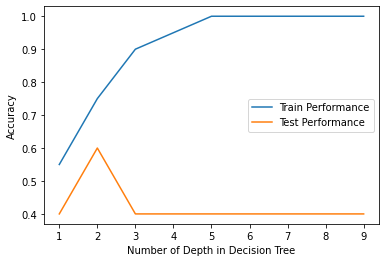

In [141]:
#Effect of maximum depth
out_train = []
out_test = []
max_depth=[1,2,3,4,5,6,7,8,9]
for i in range(len(max_depth)):
    model=tree.DecisionTreeClassifier(max_depth=max_depth[i]) 
    model.fit(norm_x_train, y_train)
    y_train_predict=model.predict(norm_x_train)
    train_acc= accuracy_score(y_train,y_train_predict)
    out_train.insert(i,train_acc)
    y_test_predict=model.predict(norm_x_test)
    test_acc=accuracy_score(y_test,y_test_predict)
    out_test.insert(i,test_acc)
plt.plot(max_depth,out_train, label='Train Performance')
plt.plot(max_depth, out_test, label = 'Test Performance')
plt.xlabel('Number of Depth in Decision Tree')
plt.ylabel('Accuracy')
plt.legend()

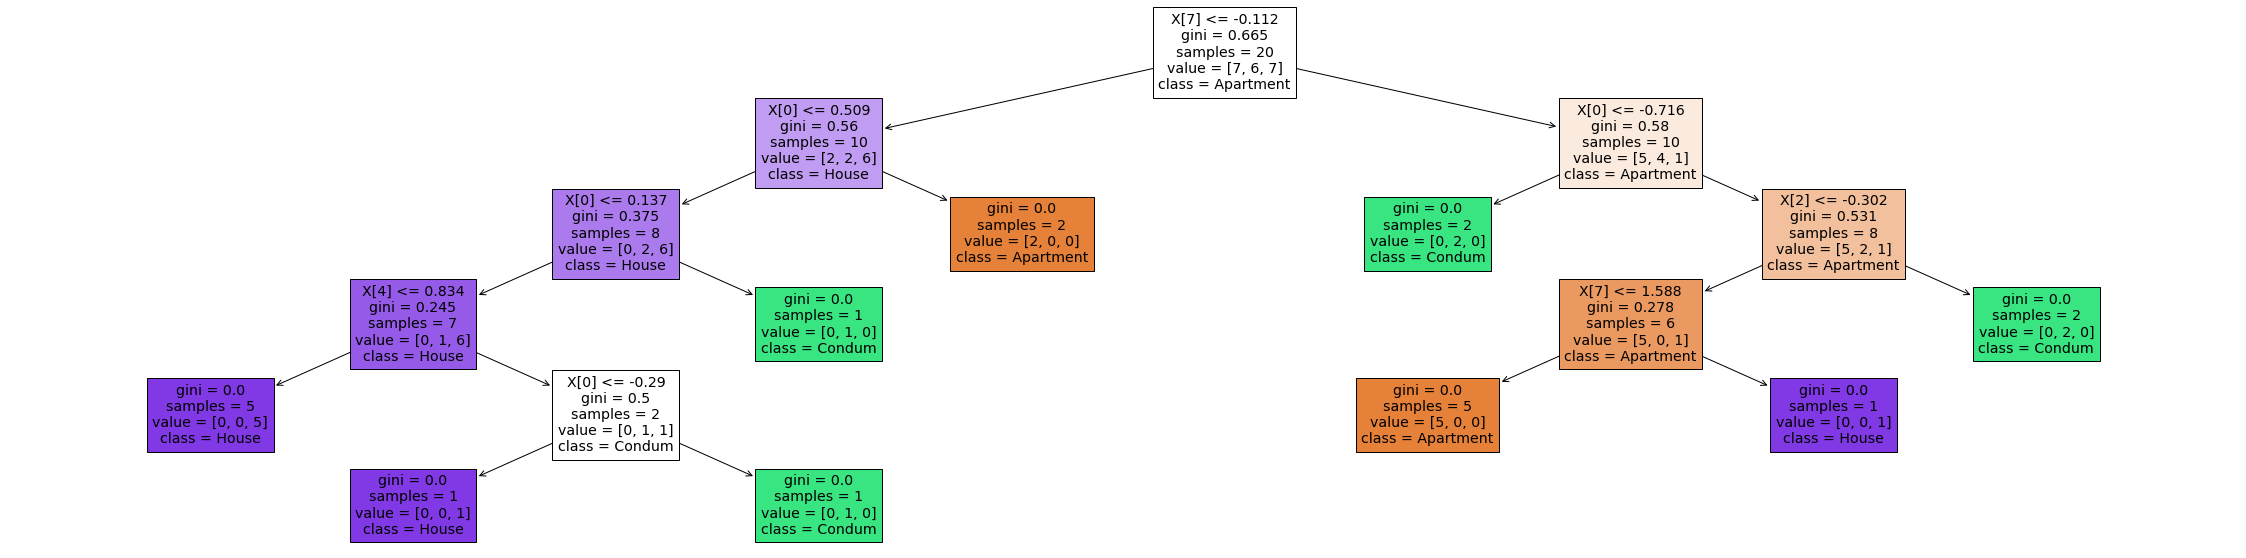

In [142]:

plt.figure(figsize=(40,10))
tree.plot_tree(model,filled=True, class_names=c)
plt.show()

In [146]:
#4. Example data
model=tree.DecisionTreeClassifier(max_depth=2) 
model.fit(norm_x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [147]:
ex_file ="/content/drive/My Drive/ML/Assignment4/example.xlsx"
example=pd.read_excel(ex_file,index_col='House ID')

norm_ex = example-mu/std
ex_predict=model.predict(norm_ex)



In [149]:
#Define the classes based on map

r = ex_predict[0]
print("Predicted class for example data",c[r])

Predicted class for example data Apartment
